# __Proyecto de Inmuebles en la Ciudad de Mexico__

## Importar librerias

In [1]:
import pandas as pd

## Importar base de datos

In [2]:
url = 'https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv'
dataset = pd.read_csv(url, sep=';')
dataset.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


## Exploracion Basica de los datos

In [3]:
# mostrar 10 filas aleatorias del df
dataset.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2083,Conjunto Comercial/Sala,Santa Fe,0,1,0,44,3500.0,3150.0,980.0
23767,Conjunto Comercial/Sala,Santa Fe,0,1,0,31,8925.0,4095.0,805.0
20859,Conjunto Comercial/Sala,Centro Histórico,0,0,0,270,31500.0,14700.0,4686.5
23361,Casa,San Miguel Chapultepec,3,0,0,90,7000.0,NaN,NaN
19870,Departamento,Santa Fe,4,2,2,133,12250.0,5600.0,910.0
2494,Departamento,Del Valle,3,2,1,120,12250.0,3430.0,NaN
1477,Conjunto Comercial/Sala,Santa Fe,0,1,0,135,19250.0,4200.0,NaN
752,Departamento,Santa Fe,2,1,1,90,7700.0,4872.0,1011.5
15828,Departamento,Tlalnepantla,2,1,0,43,3500.0,840.0,87.5
6504,Departamento,Lomas de Chapultepec,2,1,0,108,17500.0,3783.5,980.0


In [4]:
# tipo de dato del df
type(dataset)

pandas.core.frame.DataFrame

In [5]:
# cantidad de filas y columnas del df
dataset.shape

(25121, 9)

> Hay 25.121 filas y 9 columnas.

In [6]:
# nombre de las columnas
dataset.columns 

Index(['Tipo', 'Colonia', 'Habitaciones', 'Garages', 'Suites', 'Area', 'Valor',
       'Condominio', 'Impuesto'],
      dtype='object')

In [7]:
# resumen de las variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


> El resumen nos muestra que hay valores faltantes en las variables Valor, Condominio e Impuesto. Las 3 variables son de tipo numerico.

In [8]:
# explorar columna Tipo
dataset['Tipo']

0                       Cocineta
1                           Casa
2        Conjunto Comercial/Sala
3                   Departamento
4                   Departamento
                  ...           
25116    Cochera/Estacionamiento
25117                   Cocineta
25118               Departamento
25119               Departamento
25120    Conjunto Comercial/Sala
Name: Tipo, Length: 25121, dtype: object

> El formato en que muestra la informacion es una serie de pandas.

In [9]:
# mostrar los valores unicos que conforman la variable Tipo
dataset['Tipo'].unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [10]:
# mostrar valores de dos variables al mismo tiempo
dataset[['Habitaciones', 'Valor']]

,Habitaciones,Valor
0,1,5950.0
1,2,24500.0
2,0,18200.0
3,1,2800.0
4,1,2800.0
...,...,...
25116,0,49000.0
25117,0,2800.0
25118,2,4900.0
25119,2,10500.0


> Devuelve la informacion en formato dataframe de pandas.

## EDA

### __¿Cuáles son los valores promedio de alquiler por tipo de propiedad?__

In [11]:
dataset.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


In [12]:
# promedio general del valor de alquiler
dataset['Valor'].mean()

36885.05048392878

In [13]:
# agrupa los datos por la variable Tipo y promedia los valores de las demas variables
dataset.groupby('Tipo').mean(numeric_only=True)

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
Tipo,,,,,,,
Casa,3.359633,1.897248,1.438532,289.943119,31453.177064,3699.421642,6629.404851
Casa Comercial,1.801980,2.118812,0.257426,370.277228,54735.841584,7622.192308,6166.063380
Casa de Condominio,4.319672,3.555738,3.247541,566.303279,51428.609836,5286.578804,15046.939394
Casa de Vecindad,1.974684,0.379747,0.215190,79.981013,5961.740506,413.444444,706.850000
Cochera/Estacionamiento,0.064935,1.376623,0.000000,18.662338,6995.454545,1069.075000,449.458333
Cocineta,0.836088,0.020661,0.041322,29.090909,4425.856061,1521.734214,280.701461
Conjunto Comercial/Sala,0.047175,2.686323,0.000352,236.323711,57675.214550,17489.361142,5425.980245
Departamento,2.504199,1.256367,0.891899,124.014292,18683.269431,6797.092951,2634.921081
Departamento en Hotel,1.419780,0.969231,0.758242,65.848352,16285.430769,7250.650602,1768.923885


In [14]:
# Promedio de los valores de alquiler por tipo de inmueble
dataset.groupby('Tipo')['Valor'].mean()

Tipo
Casa                           31453.177064
Casa Comercial                 54735.841584
Casa de Condominio             51428.609836
Casa de Vecindad                5961.740506
Cochera/Estacionamiento         6995.454545
Cocineta                        4425.856061
Conjunto Comercial/Sala        57675.214550
Departamento                   18683.269431
Departamento en Hotel          16285.430769
Edificio Completo             409418.080645
Estudio                         8400.000000
Galpón/Depósito/Almacén       299984.140138
Hotel                          87500.000000
Industria                     420000.000000
Loft                            9924.526316
Loteo/Condominio               92166.666667
Posada/Chalé                    5180.000000
Rancho                         38014.375000
Terreno Estándar              135364.444444
Tienda en Centro Comercial     32556.785714
Tienda/Salón                   56263.544252
Name: Valor, dtype: float64

In [15]:
# ordenar valores y motrarlo en formato df
dataset.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Cocineta,4425.856061
Posada/Chalé,5180.000000
Casa de Vecindad,5961.740506
Cochera/Estacionamiento,6995.454545
Estudio,8400.000000
Loft,9924.526316
Departamento en Hotel,16285.430769
Departamento,18683.269431
Casa,31453.177064


<AxesSubplot:ylabel='Tipo'>

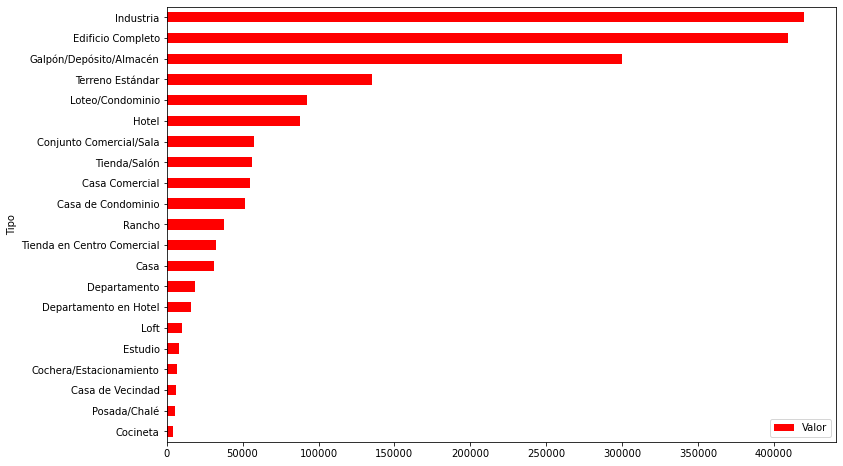

In [16]:
# Visualizacion de los promedios de los valores segun el inmueble
df_tipo_precio = dataset.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_tipo_precio.plot(kind='barh', figsize=(12,8), color='red')

### __¿Cuáles son los valores promedio de alquiler de inmuebles reidenciales?__

In [17]:
# valores unicos en la variable Tipo
dataset.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [18]:
# guardamos los inmuebles comerciales en una lista
inmuebles_comerciales = ['Conjunto Comercial/Sala', 'Edificio Completo','Tienda/Salón', 'Casa Comercial',
                         'Terreno Estándar', 'Cochera/Estacionamiento', 'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial',
                         'Hotel', 'Loteo/Condominio','Industria']

In [19]:
# Hacer una consulta a los datos
# buscar en Tipo los valores almacenados en 'inmuebles_comerciales' 
dataset.query('@inmuebles_comerciales in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
6,Conjunto Comercial/Sala,Centro Histórico,0,3,0,695,122500.0,67175.5,10605.0
11,Edificio Completo,Roma,0,0,0,536,98000.0,NaN,12470.5
24,Conjunto Comercial/Sala,Santa Fe,0,1,0,22,2450.0,NaN,NaN
26,Conjunto Comercial/Sala,Centro Histórico,0,5,0,1306,411390.0,68201.0,NaN
...,...,...,...,...,...,...,...,...,...
25107,Conjunto Comercial/Sala,Santa Fe,0,1,0,55,7000.0,3836.0,NaN
25110,Conjunto Comercial/Sala,Centro Histórico,0,0,0,140,14000.0,4942.0,1736.0
25112,Conjunto Comercial/Sala,Centro Histórico,0,0,0,32,2100.0,3622.5,290.5
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN


In [20]:
# buscar en Tipo los valores que no estan almacenados en 'inmuebles_comerciales' 
dataset.query('@inmuebles_comerciales not in Tipo')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25115,Casa de Condominio,Santa Fe,5,3,4,450,52500.0,5988.5,8162.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [21]:
# guardamos consulta en una df
df_inmuebles = dataset.query('@inmuebles_comerciales not in Tipo')
df_inmuebles.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,NaN,NaN


<AxesSubplot:ylabel='Tipo'>

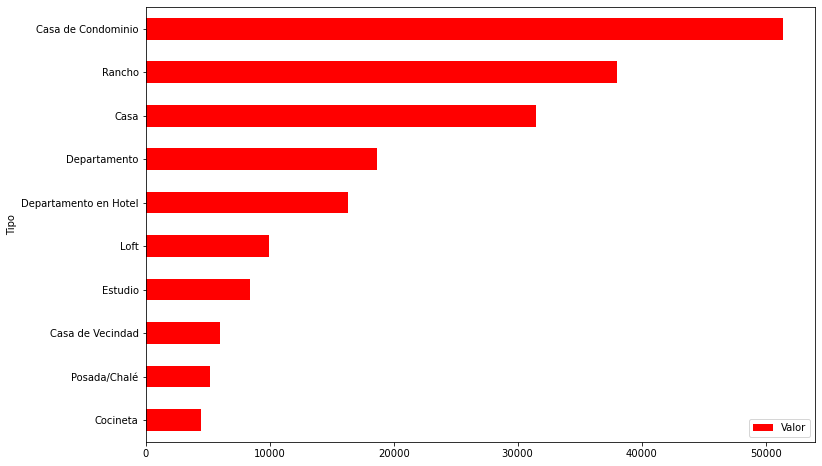

In [22]:
# Visualizacion de los promedios de los valores de inmuebles residenciales
df_tipo_precio = df_inmuebles.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
df_tipo_precio.plot(kind='barh', figsize=(12,8), color='red')

### __¿Cuál es el porcentaje de cada tipo de propiedad en nuestra base de datos?__

In [23]:
# mostrar valores unicos de inmuebles
df_inmuebles.Tipo.unique()

array(['Cocineta', 'Casa', 'Departamento', 'Casa de Condominio',
       'Departamento en Hotel', 'Casa de Vecindad', 'Loft', 'Rancho',
       'Posada/Chalé', 'Estudio'], dtype=object)

In [24]:
# mostrar cantidad por inmueble
df_inmuebles.Tipo.value_counts()

Departamento             14764
Cocineta                   726
Casa de Condominio         610
Casa                       545
Departamento en Hotel      455
Casa de Vecindad           158
Loft                        38
Rancho                       8
Estudio                      4
Posada/Chalé                 1
Name: Tipo, dtype: int64

In [25]:
# mostrar porcentajes de cada inmueble
df_inmuebles.Tipo.value_counts(normalize=True)

Departamento             0.852967
Cocineta                 0.041943
Casa de Condominio       0.035242
Casa                     0.031487
Departamento en Hotel    0.026287
Casa de Vecindad         0.009128
Loft                     0.002195
Rancho                   0.000462
Estudio                  0.000231
Posada/Chalé             0.000058
Name: Tipo, dtype: float64

<AxesSubplot:xlabel='Tipos', ylabel='Porcentajes'>

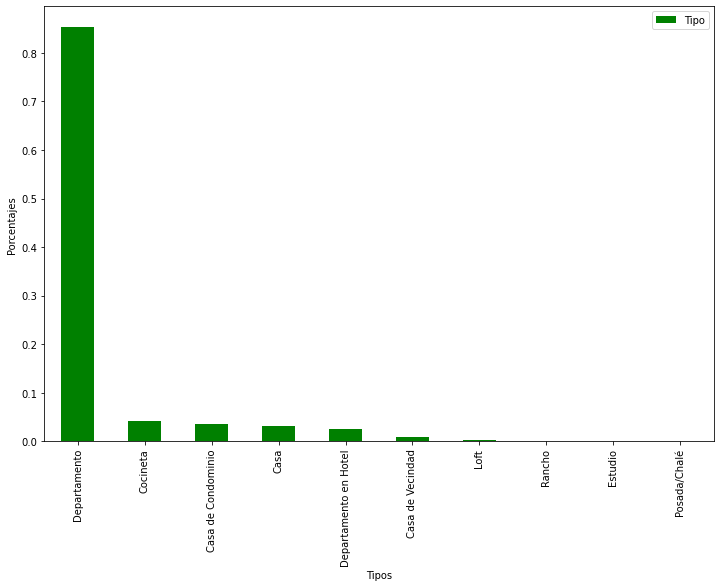

In [26]:
# visualizacion del porcentaje por tipo de inmueble
pct_tipo = df_inmuebles.Tipo.value_counts(normalize=True).to_frame()
pct_tipo.plot(kind='bar', figsize=(12,8), color='green', xlabel='Tipos', ylabel='Porcentajes')

> El 85% de los inmuebles son departamentos. El resto corresponde a los demas tipos de inmuebles por lo que el conjunto de datos esta muy desbalanceado.

> Nos enfocamos solo en los departamentos debido a que son el tipo de inmueble mas frecuente

In [27]:
# seleccionar solo registros que sean departamento
df_inmuebles.query('Tipo == "Departamento"')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
25111,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
25113,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
25114,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


In [28]:
# guardamos df en una variable
df_dept = df_inmuebles.query('Tipo == "Departamento"')
df_dept.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5


### __Calcular el promedio de habitaciones por departamento.__

In [29]:
df_dept.Habitaciones.mean()

2.5041994039555675

> El promedio de habitaciones por departamento son entre 2 y 3.

### __Verificar cuántas colonias únicas existen en nuestra base de datos.__

In [30]:
# colonias unicas donde se encuentran los departamentos
df_col = df_dept.Colonia.unique()
len(df_col)

83

> Hay 83 colonias unicas donde estan los departamentos.

### __Analizar qué colonias tienen el promedio de alquiler más alto.__

In [31]:
df_dept.groupby('Colonia')[['Valor']].mean().sort_values('Valor')

,Valor
Colonia,
Potrero de San Bernardino,1190.000000
Santa María Aztahuacán,1785.000000
San Antonio Tecomitl,2065.000000
Tláhuac,2275.000000
El Rodeo,2275.000000
...,...
Lomas de Chapultepec,30232.165189
Roma,32530.388539
Coyoacán,33205.218609


> La 3 colonias con valor promedio ma altos son: Los Alpes, Bosques de Aragon y Coyoacan.

### __Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.__

In [32]:
df_col = df_dept.groupby('Colonia')[['Valor']].mean().sort_values('Valor')
df_col = df_col[-5:]
df_col

,Valor
Colonia,
Lomas de Chapultepec,30232.165189
Roma,32530.388539
Coyoacán,33205.218609
Bosques de Aragón,35948.718750
Los Alpes,54250.000000


<AxesSubplot:ylabel='Valor Promedio'>

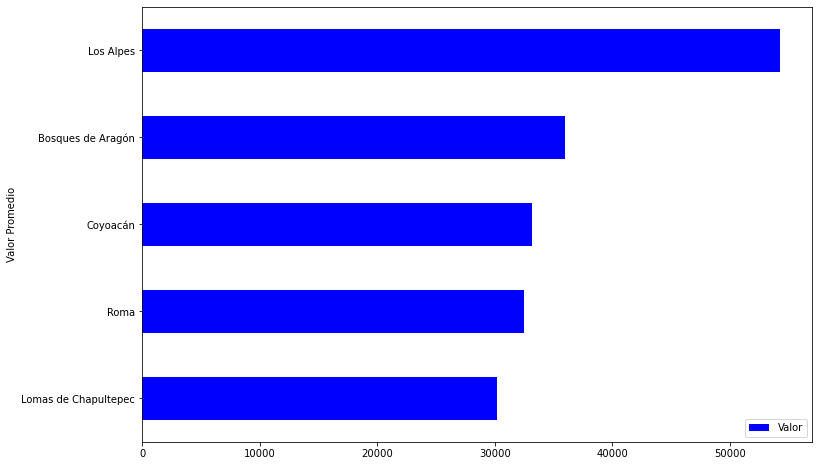

In [33]:
df_col.plot(kind='barh', figsize=(12,8), color='blue', xlabel='Valor Promedio', ylabel='Colonias')

## Tratamiento de valores nulos

In [34]:
# tabla de booleanos que senala los valores faltantes
df_inmuebles.isnull()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
25114,False,False,False,False,False,False,False,False,False
25115,False,False,False,False,False,False,False,False,False
25117,False,False,False,False,False,False,False,False,False
25118,False,False,False,False,False,False,False,False,False


In [35]:
# conteo de valores nulos por variable
df_inmuebles.isnull().sum()

Tipo               0
Colonia            0
Habitaciones       0
Garages            0
Suites             0
Area               0
Valor              7
Condominio      1155
Impuesto        4645
dtype: int64

> Hay 7 valores faltantes en Valor, 1155 en Condominio y 4645 en Impuesto.

Nos indican que los valores nulos deben ser rellenados con cero.

In [36]:
# asignar cero a los valores faltantes
df_inmuebles = df_inmuebles.fillna(0)

# verificar que no hayan valores faltantes
df_inmuebles.isnull().sum()

Tipo            0
Colonia         0
Habitaciones    0
Garages         0
Suites          0
Area            0
Valor           0
Condominio      0
Impuesto        0
dtype: int64

## Remover registros inconsistentes

In [ ]:
# filtrar registros con valores o condominio igual a cero
df_inmuebles.query('Valor==0 | Condominio==0')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
1,Casa,Polanco,2,0,1,100,24500.0,0.0,0.0
5,Casa de Condominio,Santa Fe,5,4,5,750,77000.0,0.0,0.0
7,Departamento,Centro Histórico,1,0,0,36,4200.0,0.0,0.0
49,Departamento,Santa Fe,2,1,1,70,0.0,3395.0,238.0
74,Departamento,Ciudad de los Deportes,2,0,0,80,3500.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
25010,Casa de Vecindad,Doctores,3,0,0,73,2975.0,0.0,0.0
25014,Departamento,Culhuacán CTM,3,0,1,70,4200.0,0.0,0.0
25053,Casa de Vecindad,Santa Marta Acatitla,2,0,0,55,2100.0,0.0,0.0
25086,Casa,Zacatenco,2,1,0,60,4900.0,0.0,0.0


In [38]:
# obtener indices de los registros filtrados
df_inmuebles.query('Valor==0 | Condominio==0').index

Int64Index([    1,     5,     7,    49,    74,    78,    96,   116,   136,
              154,
            ...
            24866, 24867, 24868, 24892, 24899, 25010, 25014, 25053, 25086,
            25099],
           dtype='int64', length=1162)

In [39]:
# guardar indices de registros a remover
df_remover = df_inmuebles.query('Valor==0 | Condominio==0').index

In [40]:
# remover registros del dataframe principal
df_inmuebles.drop(df_remover, axis=0, inplace=True)

In [41]:
# verificar que no hayan registros con valor o condominio igual a cero
df_inmuebles.query('Valor==0 | Condominio==0')

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
